### MINI PROJECT ON CITY_WISE WELLNESS CENTRES ###


### Introduction ###

The City-wise Wellness Centres Dataset provides a comprehensive view of the distribution and characteristics of wellness facilities across various Indian cities. The data was obtained from Data.gov.in, and it focuses on details such as city codes, wellness centre codes, categories, doctor count, centre names, and geographic coordinates. This dataset serves as an ideal foundation for exploring the accessibility and spread of wellness services using Big Data Analytics with PySpark.

### Dataset Description ###

Source: Data.gov.in – City-wise List of Wellness Centres

File Format: CSV

Total Records (Rows): 5,000+ wellness centre entries (approx., depending on latest version)

Total Columns: 10 attributes

Column Details:

citycode – unique identifier for each city

wellnesscentercode – unique ID for each wellness centre

category – type of wellness centre (e.g., AYUSH, Wellness Unit, Urban Centre)

doctorcount – number of doctors available at the centre

latitude and longitude – geographic coordinates

wellnesscentrename – official name of the centre

cityname – city or urban area where the centre is located

wellnesscenternumber – administrative number for identification

wellnesscenteraddress – physical address or locality

### Dataset Insights ###

The dataset contains wellness centres distributed across numerous Indian cities, covering diverse categories and geographical zones.

Several categories of wellness centres exist, each serving distinct health functions and service scopes.

The doctor count column helps evaluate medical resource allocation and identify centres with limited or high staff availability.

The presence of latitude and longitude enables geospatial visualization and mapping of wellness infrastructure.

Some records contain inconsistent doctor data (e.g., non-numeric or missing values), which require data cleaning — a key part of the big data workflow.

The dataset is well-suited for PySpark-based analytics, including operations like grouping, aggregation, and geographical trend analysis.

### Objective ###

This project aims to:

Analyze the distribution of wellness centres across Indian cities.

Explore category-wise and city-wise variations in healthcare facilities.

Evaluate doctor availability and resource concentration.

Visualize trends using PySpark and Matplotlib, demonstrating the integration of big data processing and visualization tools.


In [24]:
!pip install pandas


In [25]:
import pandas as pd
print(pd.__version__)


2.3.3


In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv("wellness_centres.csv")

# Basic info
print("Shape:", df.shape)
df.head()


Shape: (501, 10)


,CityCode,WellnessCenterCode,Category,DoctorCount,Latitude,Longitude,WellnessCentreName,CityName,WellnessCenterNumber,WellnessCenterAddress
0,10,AH01,Allopathy,4,23.035601,72.56946001719075 ...,NaN,Ahmedabad,079-26577393,"1st Floor, S.R.House, Opp. Mount Carmel School..."
1,10,AH02,Allopathy,2,23.012685,72.523626\n ...,NaN,Ahmedabad,079-25693262,"Room no.1,2 and 3 (Ground floor), Aayakar Bhaw..."
2,10,AH10,Allopathy,1,23.022499,72.474210\n ...,NaN,Ahmedabad,02717-243144,"AG Govt. Quarters,Block No A(1), QuarterSN 1 ..."
3,11,AL03,Allopathy,0,25.431174,81.83338281349346 ...,NaN,Prayagraj,0532-2242530,"1130/1130A Kalyani Devi, Allahabad"
4,11,AL04,Allopathy,2,25.472946,81.8570718134934 ...,NaN,Prayagraj,0532-2548040,"1/13. Prayag Strit, In front of D. P. Public s..."


In [27]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,citycode,wellnesscentercode,category,doctorcount,latitude,longitude,wellnesscentrename,cityname,wellnesscenternumber,wellnesscenteraddress
0,10,AH01,Allopathy,4,23.035601,72.56946001719075 ...,NaN,Ahmedabad,079-26577393,"1st Floor, S.R.House, Opp. Mount Carmel School..."
1,10,AH02,Allopathy,2,23.012685,72.523626\n ...,NaN,Ahmedabad,079-25693262,"Room no.1,2 and 3 (Ground floor), Aayakar Bhaw..."
2,10,AH10,Allopathy,1,23.022499,72.474210\n ...,NaN,Ahmedabad,02717-243144,"AG Govt. Quarters,Block No A(1), QuarterSN 1 ..."
3,11,AL03,Allopathy,0,25.431174,81.83338281349346 ...,NaN,Prayagraj,0532-2242530,"1130/1130A Kalyani Devi, Allahabad"
4,11,AL04,Allopathy,2,25.472946,81.8570718134934 ...,NaN,Prayagraj,0532-2548040,"1/13. Prayag Strit, In front of D. P. Public s..."


In [28]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   citycode               501 non-null    int64  
 1   wellnesscentercode     493 non-null    object 
 2   category               501 non-null    object 
 3   doctorcount            501 non-null    int64  
 4   latitude               471 non-null    float64
 5   longitude              486 non-null    object 
 6   wellnesscentrename     0 non-null      float64
 7   cityname               501 non-null    object 
 8   wellnesscenternumber   484 non-null    object 
 9   wellnesscenteraddress  492 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.3+ KB


,citycode,wellnesscentercode,category,doctorcount,latitude,longitude,wellnesscentrename,cityname,wellnesscenternumber,wellnesscenteraddress
count,501.000000,493,501,501.000000,471.000000,486,0.0,501,484,492
unique,NaN,491,5,NaN,NaN,372,NaN,24,391,413
top,NaN,CDAC,Allopathy,NaN,NaN,...,NaN,DELHI/HQ/DIRECTORATE/MINISTRY,9312901213,"Parliament House annexe, Sansad marg area, New..."
freq,NaN,3,377,NaN,NaN,14,NaN,165,18,4
mean,20.473054,NaN,NaN,3.073852,23.405313,NaN,NaN,NaN,NaN,NaN
std,5.562173,NaN,NaN,2.426630,6.043232,NaN,NaN,NaN,NaN,NaN
min,10.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,18.000000,NaN,NaN,2.000000,19.103847,NaN,NaN,NaN,NaN,NaN
50%,18.000000,NaN,NaN,2.000000,25.466766,NaN,NaN,NaN,NaN,NaN
75%,25.000000,NaN,NaN,4.000000,28.582391,NaN,NaN,NaN,NaN,NaN


In [29]:
print(df.columns)


Index(['citycode', 'wellnesscentercode', 'category', 'doctorcount', 'latitude',
       'longitude', 'wellnesscentrename', 'cityname', 'wellnesscenternumber',
       'wellnesscenteraddress'],
      dtype='object')


In [30]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
df.head()


Total rows: 501
Total columns: 10


,citycode,wellnesscentercode,category,doctorcount,latitude,longitude,wellnesscentrename,cityname,wellnesscenternumber,wellnesscenteraddress
0,10,AH01,Allopathy,4,23.035601,72.56946001719075 ...,NaN,Ahmedabad,079-26577393,"1st Floor, S.R.House, Opp. Mount Carmel School..."
1,10,AH02,Allopathy,2,23.012685,72.523626\n ...,NaN,Ahmedabad,079-25693262,"Room no.1,2 and 3 (Ground floor), Aayakar Bhaw..."
2,10,AH10,Allopathy,1,23.022499,72.474210\n ...,NaN,Ahmedabad,02717-243144,"AG Govt. Quarters,Block No A(1), QuarterSN 1 ..."
3,11,AL03,Allopathy,0,25.431174,81.83338281349346 ...,NaN,Prayagraj,0532-2242530,"1130/1130A Kalyani Devi, Allahabad"
4,11,AL04,Allopathy,2,25.472946,81.8570718134934 ...,NaN,Prayagraj,0532-2548040,"1/13. Prayag Strit, In front of D. P. Public s..."


In [31]:
print("Unique cities:", df['cityname'].nunique())
print("Unique categories:", df['category'].nunique())
print("Unique wellness centres:", df['wellnesscentercode'].nunique())


Unique cities: 24
Unique categories: 5
Unique wellness centres: 491


In [32]:
!pip install matplotlib


In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum

# Start Spark session
spark = SparkSession.builder.appName("WellnessCentres").getOrCreate()

# Load data
df_spark = spark.read.csv("wellness_centres.csv", header=True, inferSchema=True)

# Centres per city
city_counts = df_spark.groupBy("cityname").agg(count("wellnesscentercode").alias("centre_count"))

# Show top 10 cities in Spark
city_counts.orderBy(col("centre_count").desc()).show(10)


+--------------------+------------+
|            cityname|centre_count|
+--------------------+------------+
|DELHI/HQ/DIRECTOR...|         157|
|                NULL|          66|
|              Mumbai|          36|
|           Hyderabad|          29|
|             Kolkata|          26|
|             Chennai|          25|
|              Nagpur|          21|
|             Lucknow|          16|
|           Bengaluru|          16|
|            Guwahati|          15|
+--------------------+------------+
only showing top 10 rows


<Axes: ylabel='cityname'>

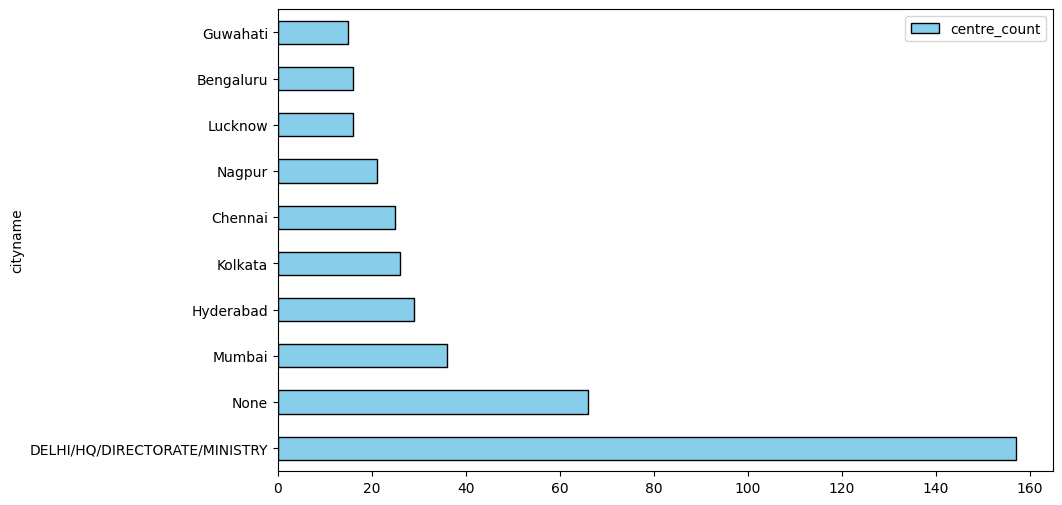

In [34]:
#count of wellness centres
city_counts_pd = city_counts.orderBy(col("centre_count").desc()).toPandas()

city_counts_pd.head(10).plot(kind='barh', x='cityname', y='centre_count',
                             figsize=(10,6), color="skyblue", edgecolor="black")


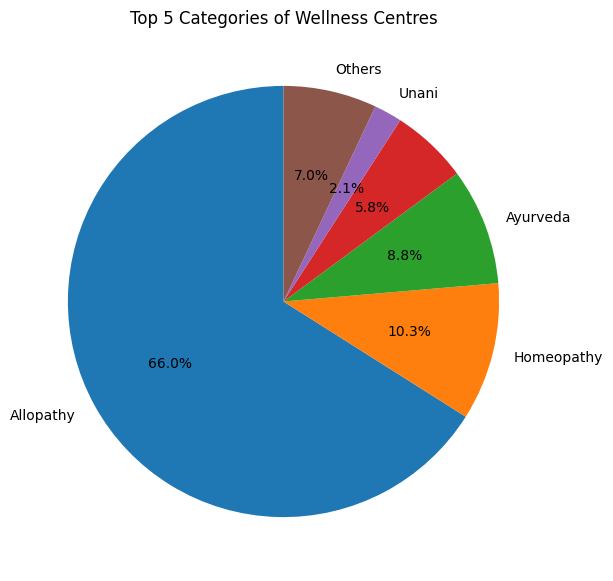

In [37]:
# Top 5 categories of wellness centres
from pyspark.sql.functions import count

# Count the number of wellness centres per category
category_counts = df_spark.groupBy("category").agg(count("*").alias("count")).toPandas()

import pandas as pd
import matplotlib.pyplot as plt

top_categories = category_counts.sort_values("count", ascending=False)
top5 = top_categories.head(5)
others = pd.DataFrame([["Others", top_categories['count'][5:].sum()]], columns=["category", "count"])
final_data = pd.concat([top5, others])

plt.figure(figsize=(7,7))
plt.pie(final_data['count'], labels=final_data['category'], autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Categories of Wellness Centres")
plt.show()



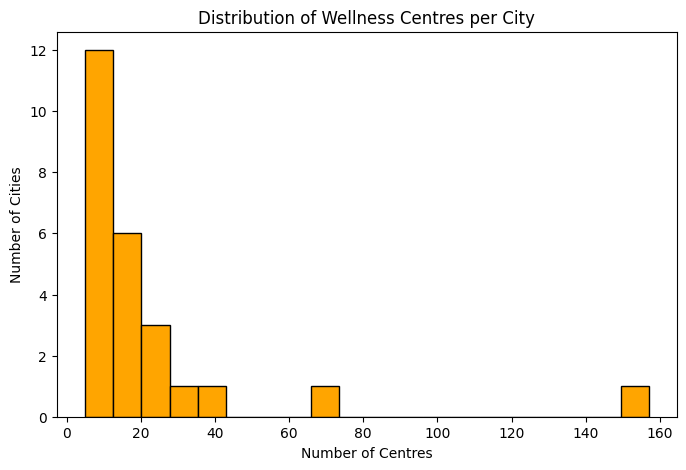

In [38]:
#Distribution of wellness centres per city
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(city_counts_pd['centre_count'], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Wellness Centres per City")
plt.xlabel("Number of Centres")
plt.ylabel("Number of Cities")
plt.show()


In [39]:
from pyspark.sql.functions import col, count, sum, expr

city_stats = df_spark.groupBy("cityname").agg(
    count("wellnesscentercode").alias("centres"),
    expr("sum(try_cast(doctorcount as int))").alias("doctors")
).toPandas()


In [40]:
from pyspark.sql.functions import col

# Keep only rows where doctorcount is numeric
df_clean = df_spark.filter(col("doctorcount").rlike("^[0-9]+$"))

city_stats = df_clean.groupBy("cityname").agg(
    count("wellnesscentercode").alias("centres"),
    sum(col("doctorcount").cast("int")).alias("doctors")
).toPandas()


In [41]:
from pyspark.sql.functions import when

df_fixed = df_spark.withColumn(
    "doctorcount_int",
    when(col("doctorcount").rlike("^[0-9]+$"), col("doctorcount").cast("int")).otherwise(None)
)

city_stats = df_fixed.groupBy("cityname").agg(
    count("wellnesscentercode").alias("centres"),
    sum("doctorcount_int").alias("doctors")
).toPandas()


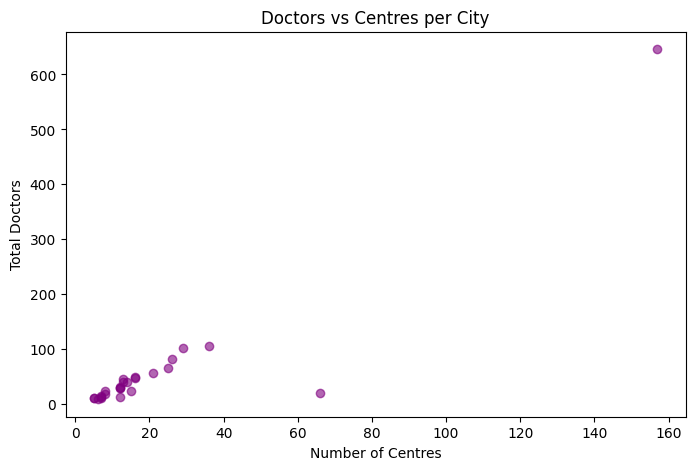

In [42]:
#Doctors vs centres per city
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(city_stats['centres'], city_stats['doctors'], alpha=0.6, color="purple")
plt.title("Doctors vs Centres per City")
plt.xlabel("Number of Centres")
plt.ylabel("Total Doctors")
plt.show()


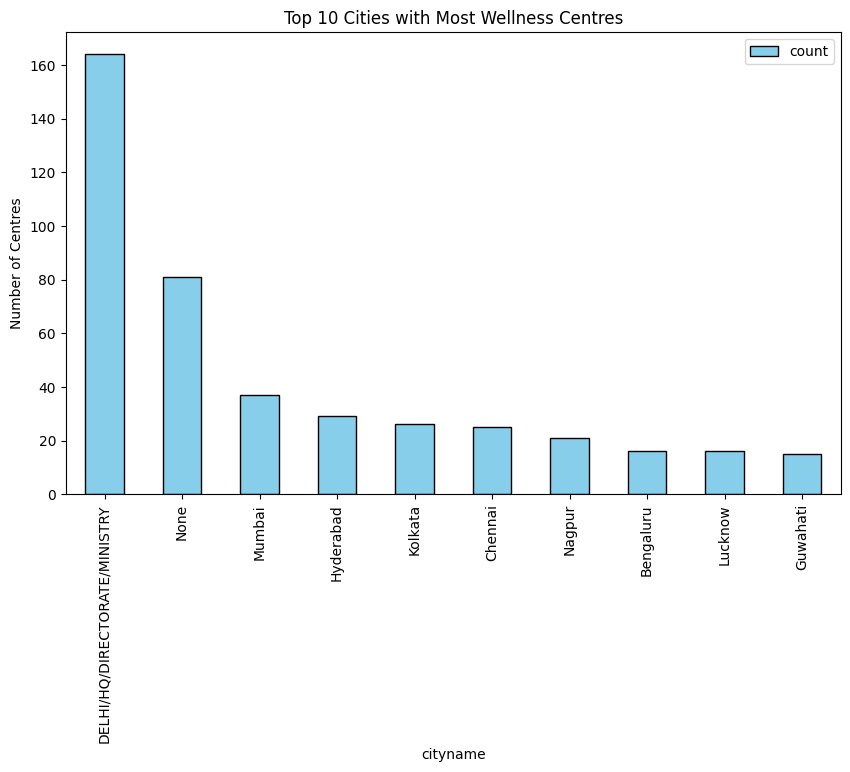

In [43]:
#Top 10 cities with most wellness centres
top10 = df_spark.groupBy("cityname").count().orderBy(col("count").desc()).limit(10).toPandas()
top10.plot(kind="bar", x="cityname", y="count", figsize=(10,6), color="skyblue", edgecolor="black")
plt.title("Top 10 Cities with Most Wellness Centres")
plt.ylabel("Number of Centres")
plt.show()


In [44]:
!pip install seaborn

In [45]:
#Doctor count
df_spark.select("doctorcount").distinct().show(50, False)


+-------------------+
|doctorcount        |
+-------------------+
|7                  |
| Kharvel Nagar     |
|3                  |
|8                  |
|0                  |
| P & T Colony      |
|5                  |
|31                 |
|02717-243144       |
|6                  |
|079-23243433       |
|079-25506622       |
| Opp. DAC(East)    |
|0265-2415555       |
| RAJDANGA MAIN ROAD|
|  Unit IV          |
|079-27478393       |
|079-22680847       |
| Panbazar          |
|Guwahati-781006"   |
| Khatla            |
|9                  |
|1                  |
|079-25693262       |
|10                 |
|4                  |
|12                 |
|13                 |
| Bhubaneswar       |
|2                  |
|NULL               |
+-------------------+



In [46]:
from pyspark.sql.functions import col, when

df_clean = df_spark.withColumn(
    "doctorcount_int",
    when(col("doctorcount").rlike("^[0-9]+$"), col("doctorcount").cast("int")).otherwise(None)
)


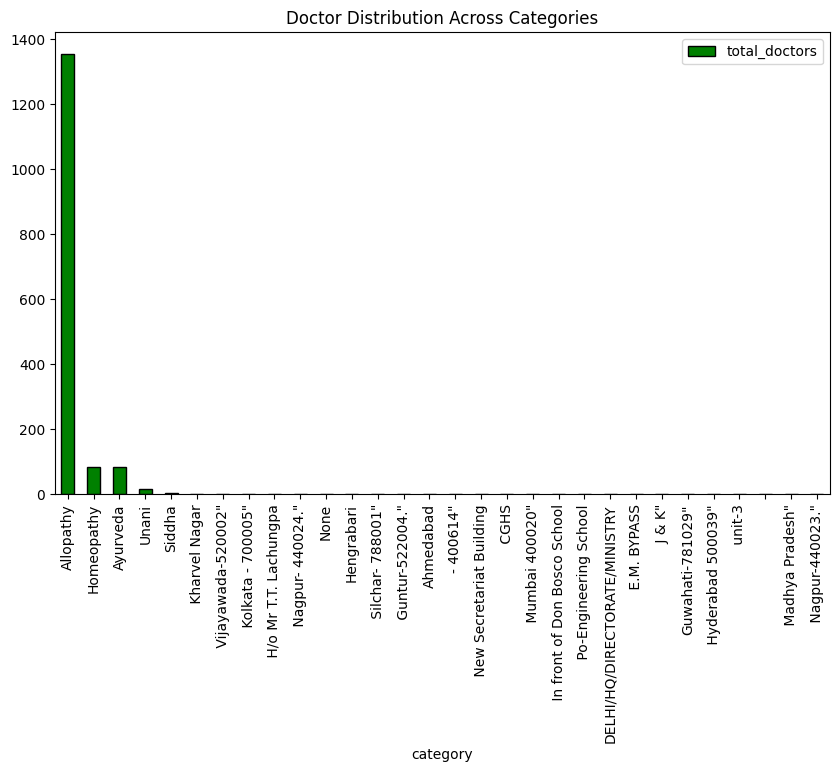

In [47]:
#Doctors Distribution across categories
from pyspark.sql.functions import sum

doctor_cat = df_clean.groupBy("category") \
    .agg(sum("doctorcount_int").alias("total_doctors")) \
    .orderBy(col("total_doctors").desc()) \
    .toPandas()

doctor_cat.plot(kind="bar", x="category", y="total_doctors",
                figsize=(10,6), color="green", edgecolor="black")
plt.title("Doctor Distribution Across Categories")
plt.show()


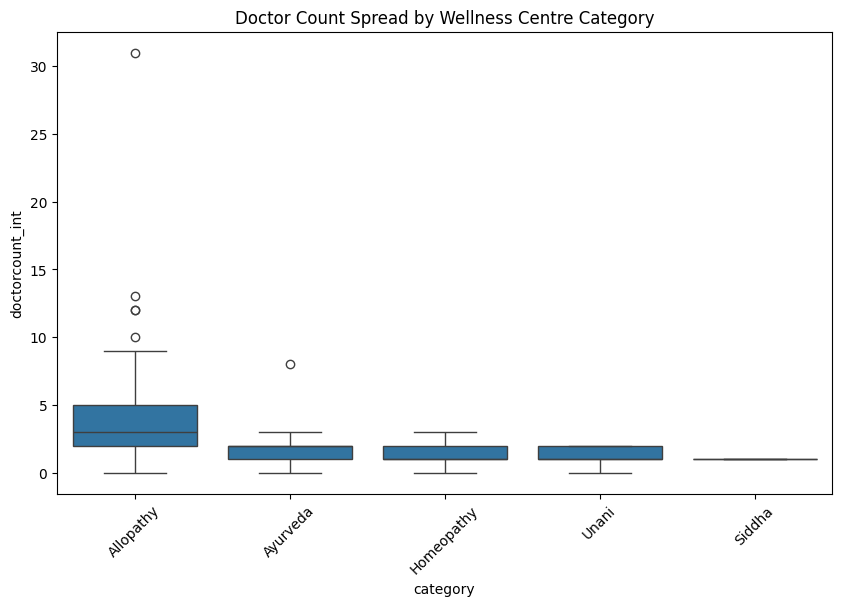

In [48]:
#Doctor count spread by wellness centre category
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DF to Pandas with cleaned column
doctor_per_centre = df_clean.select("category", "doctorcount_int").toPandas()

# Drop nulls (rows where doctorcount wasn’t numeric)
doctor_per_centre = doctor_per_centre.dropna(subset=["doctorcount_int"])

# Make boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="category", y="doctorcount_int", data=doctor_per_centre)
plt.xticks(rotation=45)
plt.title("Doctor Count Spread by Wellness Centre Category")
plt.show()


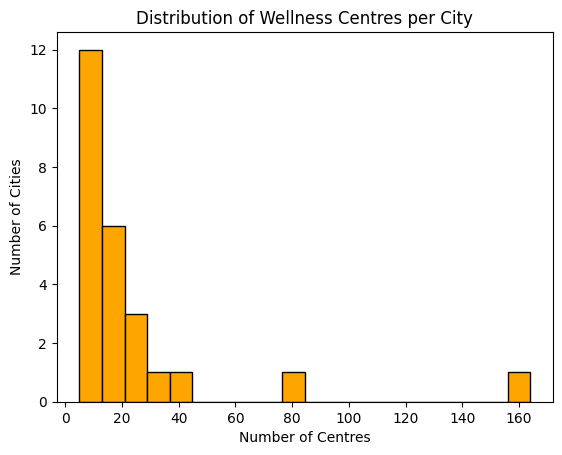

In [49]:
#Distribution of wellness centres per city
city_counts_pd = df_spark.groupBy("cityname").count().toPandas()
plt.hist(city_counts_pd['count'], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Wellness Centres per City")
plt.xlabel("Number of Centres")
plt.ylabel("Number of Cities")
plt.show()


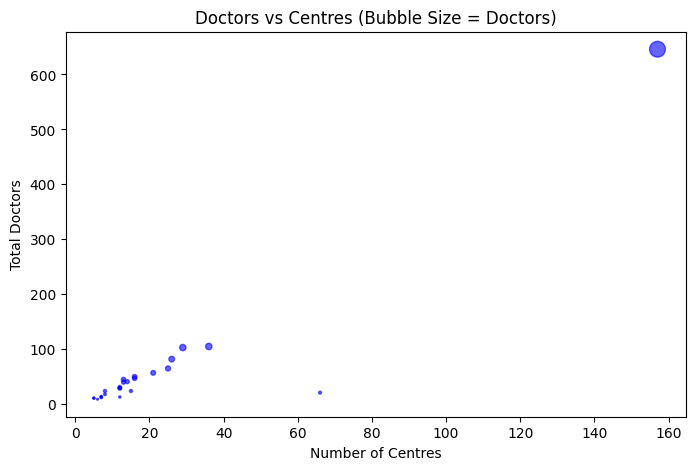

In [50]:
#Doctors VS Centres
city_stats = df_clean.groupBy("cityname").agg(
    count("wellnesscentercode").alias("centres"),
    sum("doctorcount_int").alias("doctors")
).toPandas()

plt.figure(figsize=(8,5))
plt.scatter(city_stats['centres'], city_stats['doctors'],
            s=city_stats['doctors']/5,  # bubble size scaled
            alpha=0.6, c="blue")
plt.title("Doctors vs Centres (Bubble Size = Doctors)")
plt.xlabel("Number of Centres")
plt.ylabel("Total Doctors")
plt.show()


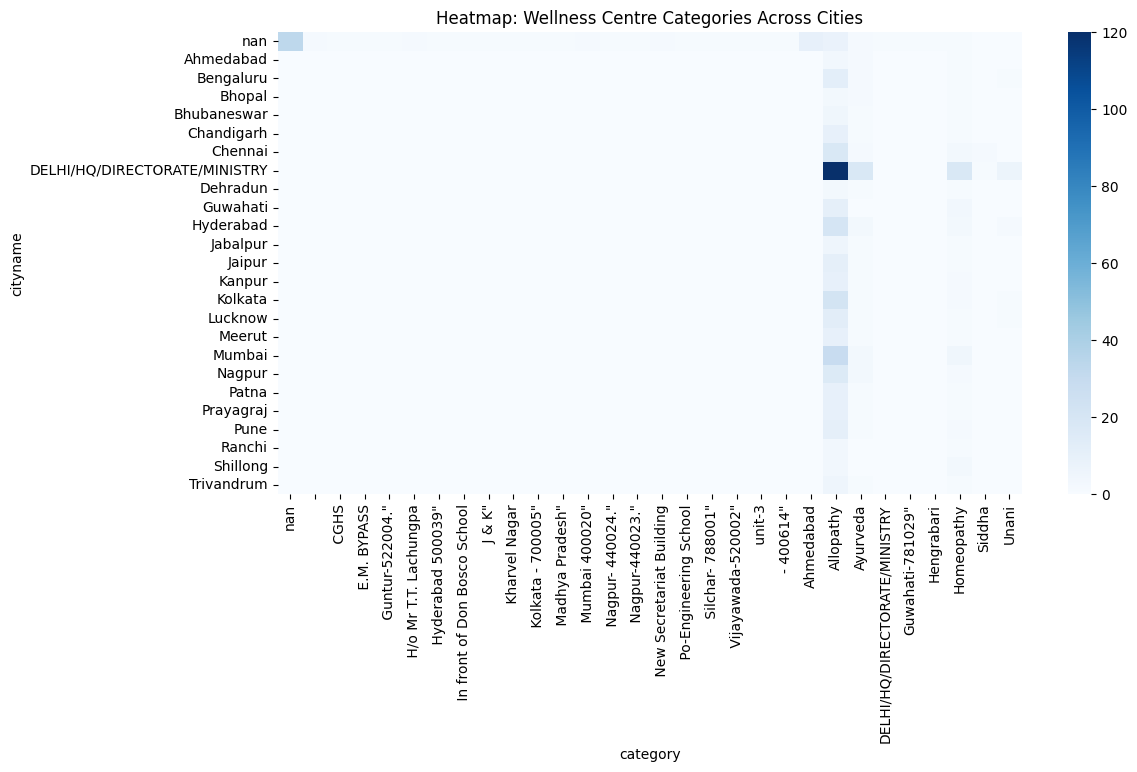

In [51]:
#Wellness centres categories across cities
pivot_data = df_spark.groupBy("cityname", "category").count().toPandas()
pivot_table = pivot_data.pivot(index="cityname", columns="category", values="count").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="Blues")
plt.title("Heatmap: Wellness Centre Categories Across Cities")
plt.show()


In [52]:
!pip install folium


In [53]:
print(df_clean.columns)   # Spark columns
print(df_clean.toPandas().columns)   # Pandas columns


['CityCode', 'WellnessCenterCode', 'Category', 'DoctorCount', 'Latitude', 'Longitude', 'WellnessCentreName', 'CityName', 'WellnessCenterNumber', 'WellnessCenterAddress', 'doctorcount_int']
Index(['CityCode', 'WellnessCenterCode', 'Category', 'DoctorCount', 'Latitude',
       'Longitude', 'WellnessCentreName', 'CityName', 'WellnessCenterNumber',
       'WellnessCenterAddress', 'doctorcount_int'],
      dtype='object')


In [54]:
from pyspark.sql import SparkSession

# Start a Spark session (you can name it anything)
spark = SparkSession.builder \
    .appName("WellnessCentresProject") \
    .config("spark.ui.showConsoleProgress", "false") \
    .getOrCreate()

print("Spark session started successfully!")


Spark session started successfully!


In [55]:
# Load dataset
df_spark = spark.read.csv("wellness_centres.csv", header=True, inferSchema=True)

# Display first few rows
df_spark.show(5)


+--------------------+------------------+---------+------------+--------------------+--------------------+------------------+---------+--------------------+---------------------+
|            CityCode|WellnessCenterCode| Category| DoctorCount|            Latitude|           Longitude|WellnessCentreName| CityName|WellnessCenterNumber|WellnessCenterAddress|
+--------------------+------------------+---------+------------+--------------------+--------------------+------------------+---------+--------------------+---------------------+
|                  10|              AH01|Allopathy|           4|   23.03560077037483|72.56946001719075...|                NA|Ahmedabad|        079-26577393| 1st Floor, S.R.Ho...|
|                  10|              AH02|Allopathy|           2|           23.012685|           72.523626|              NULL|     NULL|                NULL|                 NULL|
|                 ...|                NA|Ahmedabad|079-25693262|Room no.1,2 and 3...|                NULL

In [56]:
print("Total rows:", df_spark.count())
print("Columns:", df_spark.columns)


Total rows: 571
Columns: ['CityCode', 'WellnessCenterCode', 'Category', 'DoctorCount', 'Latitude', 'Longitude', 'WellnessCentreName', 'CityName', 'WellnessCenterNumber', 'WellnessCenterAddress']


In [57]:
print("Total number of unique cities:", df_spark.select("cityname").distinct().count())
print("Total number of categories:", df_spark.select("category").distinct().count())


Total number of unique cities: 25
Total number of categories: 30


In [58]:
print("List of all wellness centre categories:")
df_spark.select("category").distinct().show()


List of all wellness centre categories:
+--------------------+
|            category|
+--------------------+
|            Ayurveda|
|               Unani|
|       Kharvel Nagar|
|  Vijayawada-520002"|
|           Allopathy|
|   Kolkata - 700005"|
| H/o Mr T.T. Lach...|
|    Nagpur- 440024."|
|          Hengrabari|
|    Silchar- 788001"|
|     Guntur-522004."|
|           Ahmedabad|
|           - 400614"|
| New Secretariat ...|
|                CGHS|
|      Mumbai 400020"|
| In front of Don ...|
| Po-Engineering S...|
|DELHI/HQ/DIRECTOR...|
|         E.M. BYPASS|
+--------------------+
only showing top 20 rows


In [59]:
print("Number of wellness centres in each city:")
df_spark.groupBy("cityname").count().orderBy("count", ascending=False).show(10, False)


Number of wellness centres in each city:
+-----------------------------+-----+
|cityname                     |count|
+-----------------------------+-----+
|DELHI/HQ/DIRECTORATE/MINISTRY|164  |
|NULL                         |81   |
|Mumbai                       |37   |
|Hyderabad                    |29   |
|Kolkata                      |26   |
|Chennai                      |25   |
|Nagpur                       |21   |
|Lucknow                      |16   |
|Bengaluru                    |16   |
|Guwahati                     |15   |
+-----------------------------+-----+
only showing top 10 rows


In [60]:
print("Number of wellness centres per category:")
df_spark.groupBy("category").count().orderBy("count", ascending=False).show()


Number of wellness centres per category:
+--------------------+-----+
|            category|count|
+--------------------+-----+
|           Allopathy|  377|
|          Homeopathy|   59|
|            Ayurveda|   50|
|                NULL|   33|
|               Unani|   12|
|           Ahmedabad|   10|
|              Siddha|    3|
| H/o Mr T.T. Lach...|    2|
| New Secretariat ...|    2|
|      Mumbai 400020"|    2|
|                    |    2|
|       Kharvel Nagar|    1|
|  Vijayawada-520002"|    1|
|   Kolkata - 700005"|    1|
|    Nagpur- 440024."|    1|
|          Hengrabari|    1|
|    Silchar- 788001"|    1|
|     Guntur-522004."|    1|
|           - 400614"|    1|
|                CGHS|    1|
+--------------------+-----+
only showing top 20 rows


In [61]:
from pyspark.sql.functions import col, when, sum

df_clean = df_spark.withColumn(
    "doctorcount_int",
    when(col("doctorcount").rlike("^[0-9]+$"), col("doctorcount").cast("int")).otherwise(None)
)

print("Total doctors per city:")
df_clean.groupBy("cityname").agg(sum("doctorcount_int").alias("total_doctors")) \
    .orderBy(col("total_doctors").desc()).show(10, False)


Total doctors per city:
+-----------------------------+-------------+
|cityname                     |total_doctors|
+-----------------------------+-------------+
|DELHI/HQ/DIRECTORATE/MINISTRY|646          |
|Mumbai                       |105          |
|Hyderabad                    |103          |
|Kolkata                      |82           |
|Chennai                      |65           |
|Nagpur                       |57           |
|Bengaluru                    |50           |
|Lucknow                      |47           |
|Jaipur                       |45           |
|Pune                         |41           |
+-----------------------------+-------------+
only showing top 10 rows


In [62]:
from pyspark.sql.functions import count

city_centre_count = df_spark.groupBy("cityname").agg(count("wellnesscentercode").alias("centre_count"))
print("Cities having more than 20 centres:")
city_centre_count.filter(col("centre_count") > 20).orderBy("centre_count", ascending=False).show()


Cities having more than 20 centres:
+--------------------+------------+
|            cityname|centre_count|
+--------------------+------------+
|DELHI/HQ/DIRECTOR...|         157|
|                NULL|          66|
|              Mumbai|          36|
|           Hyderabad|          29|
|             Kolkata|          26|
|             Chennai|          25|
|              Nagpur|          21|
+--------------------+------------+



In [63]:
category_doctors = df_clean.groupBy("category").agg(sum("doctorcount_int").alias("total_doctors"))
max_category = category_doctors.orderBy(col("total_doctors").desc()).limit(1)
print("Category with the maximum total doctors:")
max_category.show()


Category with the maximum total doctors:
+---------+-------------+
| category|total_doctors|
+---------+-------------+
|Allopathy|         1354|
+---------+-------------+



In [64]:
from pyspark.sql.functions import avg

city_avg = df_clean.groupBy("cityname").agg(avg("doctorcount_int").alias("avg_doctors"))
city_avg.orderBy(col("avg_doctors").desc()).show(5, False)


+-----------------------------+------------------+
|cityname                     |avg_doctors       |
+-----------------------------+------------------+
|DELHI/HQ/DIRECTORATE/MINISTRY|3.9390243902439024|
|Hyderabad                    |3.5517241379310347|
|Jaipur                       |3.4615384615384617|
|Kolkata                      |3.1538461538461537|
|Bengaluru                    |3.125             |
+-----------------------------+------------------+
only showing top 5 rows


In [65]:
high_doctor_df = df_clean.filter(col("doctorcount_int") > 5)
high_doctor_df.coalesce(1).write.option("header", True).mode("overwrite").csv("HighDoctorCentres")
print("Saved filtered centres with more than 5 doctors into folder: HighDoctorCentres")


Saved filtered centres with more than 5 doctors into folder: HighDoctorCentres


In [66]:
missing = df_clean.filter(col("doctorcount_int").isNull())
print("Cities with missing / invalid doctor counts:")
missing.select("cityname", "doctorcount").distinct().show(10, False)


Cities with missing / invalid doctor counts:
+--------+-------------------+
|cityname|doctorcount        |
+--------+-------------------+
|NULL    | Kharvel Nagar     |
|NULL    | P & T Colony      |
|NULL    |NULL               |
|NULL    |02717-243144       |
|NULL    |079-23243433       |
|NULL    |079-25506622       |
|NULL    | Opp. DAC(East)    |
|NULL    |0265-2415555       |
|NULL    | RAJDANGA MAIN ROAD|
|NULL    |  Unit IV          |
+--------+-------------------+
only showing top 10 rows


In [67]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

windowSpec = Window.partitionBy("cityname").orderBy(col("doctorcount_int").desc())

ranked = df_clean.withColumn("rank", rank().over(windowSpec))
print("Top 3 wellness centres per city (by doctor count):")
ranked.filter(col("rank") <= 3).select("cityname", "wellnesscentrename", "doctorcount_int", "rank").show(20, False)


Top 3 wellness centres per city (by doctor count):
+-----------+------------------+---------------+----+
|cityname   |wellnesscentrename|doctorcount_int|rank|
+-----------+------------------+---------------+----+
|NULL       |NULL              |4              |1   |
|NULL       |NULL              |4              |1   |
|NULL       |NULL              |3              |3   |
|Ahmedabad  |NA                |4              |1   |
|Ahmedabad  |NA                |4              |1   |
|Ahmedabad  |NA                |3              |3   |
|Bengaluru  |NA                |7              |1   |
|Bengaluru  |NA                |4              |2   |
|Bengaluru  |NA                |4              |2   |
|Bengaluru  |NA                |4              |2   |
|Bengaluru  |NA                |4              |2   |
|Bengaluru  |NA                |4              |2   |
|Bengaluru  |NA                |4              |2   |
|Bhopal     |NA                |2              |1   |
|Bhopal     |NA                

In [68]:
df_flagged = df_clean.withColumn("is_high_doctor_centre", (col("doctorcount_int") > 5).cast("int"))
df_flagged.select("wellnesscentrename", "doctorcount_int", "is_high_doctor_centre").show(10)


+------------------+---------------+---------------------+
|wellnesscentrename|doctorcount_int|is_high_doctor_centre|
+------------------+---------------+---------------------+
|                NA|              4|                    0|
|              NULL|              2|                    0|
|              NULL|           NULL|                 NULL|
|              NULL|              1|                    0|
|              NULL|           NULL|                 NULL|
|                NA|              0|                    0|
|                NA|              2|                    0|
|                NA|              0|                    0|
|                NA|              4|                    0|
|                NA|              3|                    0|
+------------------+---------------+---------------------+
only showing top 10 rows


In [69]:
df_clean.describe(["doctorcount_int"]).show()


+-------+------------------+
|summary|   doctorcount_int|
+-------+------------------+
|  count|               501|
|   mean|3.0738522954091816|
| stddev|  2.42663036537082|
|    min|                 0|
|    max|                31|
+-------+------------------+



In [70]:
df_clean.coalesce(1).write.option("header", True).mode("overwrite").csv("Cleaned_WellnessData")
print(" Cleaned dataset saved to Cleaned_WellnessData folder.")


 Cleaned dataset saved to Cleaned_WellnessData folder.


### Conclusion ###

The analysis of the City-wise Wellness Centres Dataset reveals a diverse distribution of wellness facilities across Indian cities. The results show that some urban regions have a high concentration of centres and medical personnel, while others possess only a few, indicating potential disparities in healthcare accessibility.

The category-wise study demonstrates that certain types of wellness centres (such as AYUSH and Urban Wellness Units) dominate specific regions, reflecting policy priorities and local healthcare demand. The doctor count analysis highlights differences in medical resource allocation, with a few cities maintaining significantly higher staff strength.

Overall, the dataset provides crucial insights into the geographical spread, staffing pattern, and category-wise segmentation of wellness centres. Such findings can support government agencies and planners in:

Identifying under-served areas,

Allocating healthcare resources more effectively, and

Strategically expanding the wellness network for equitable service delivery.

In conclusion, this project demonstrates how Big Data Analytics with PySpark can uncover meaningful patterns in public health data, enabling data-driven decision-making to strengthen India’s wellness infrastructure.